# Car Evaluation Dataset

# Hypotheses

1. There is a relationship between the buying price and car acceptability.
2. Safety ratings significantly impact car acceptability.
3. Maintenance cost influences the overall evaluation of cars.
4. Relationship between the Number of Doors and Car Acceptability.
5. Association between Safety and Maintenance Costs
6. Correlation between Buying Price and Technical Characteristics.
7. Influence of the Number of Persons on Car Acceptability.
8. Analysis of Acceptability Across Different Maintenance and Safety Levels.
9. Identification of Ideal Car Characteristics for 'Good' and 'Very Good' Ratings.
10. Impact of Luggage Boot Size on Car Acceptability

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
columns = ['buying','maint','doors','persons','lug_boot','safety','class']
df = pd.read_csv('data/car.data',names=columns)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [14]:
# Check for missing values
print(df.isnull().sum())

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [15]:
# Explore basic statistics of numerical attributes
print(df.describe())


       buying  maint doors persons lug_boot safety  class
count    1728   1728  1728    1728     1728   1728   1728
unique      4      4     4       3        3      3      4
top     vhigh  vhigh     2       2    small    low  unacc
freq      432    432   432     576      576    576   1210


In [16]:

# Explore unique values in categorical attributes
for column in df.select_dtypes(include=['object']).columns:
    print(f"\n{column} unique values: {df[column].unique()}")



buying unique values: ['vhigh' 'high' 'med' 'low']

maint unique values: ['vhigh' 'high' 'med' 'low']

doors unique values: ['2' '3' '4' '5more']

persons unique values: ['2' '4' 'more']

lug_boot unique values: ['small' 'med' 'big']

safety unique values: ['low' 'med' 'high']

class unique values: ['unacc' 'acc' 'vgood' 'good']


In [17]:
# Explore class distribution
print(df['class'].value_counts())


class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


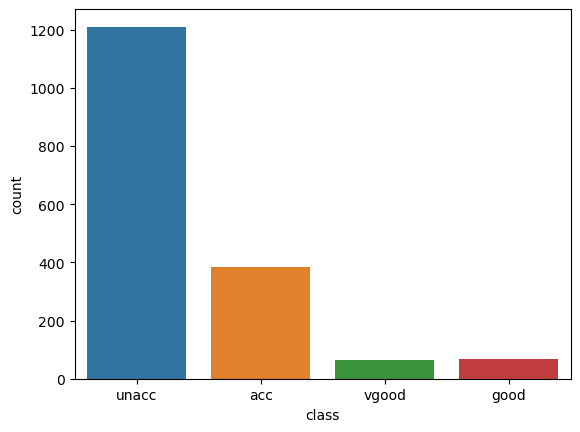

In [20]:
# Countplot to visualize class distribution
sns.countplot(x='class', data=df)
plt.show()

The chart is a count plot that shows the distribution of car acceptability based on the Car Evaluation Database. The chart has four slices, each representing a different class of car acceptability: unacc (unacceptable), acc (acceptable), good, and v-good (very good). 

According to the chart, the majority of the cars in the database are unacceptable (70.023%), followed by acceptable (22.222%), good (3.993%), and very good (3.762%). 
This means that most of the cars do not meet the criteria of the hierarchical decision model that evaluates cars based on price, technical characteristics, and comfort. Only a small fraction of the cars are considered good or very good by the model.

To calculate the percentage distributions,use the frequency data from the Car Evaluation Database and the formula for relative frequency distributions. The formula is:

Relative frequency = Frequency / Total number of observations

The frequency data shows the number of instances for each class of car acceptability: unacc (unacceptable), acc (acceptable), good, and v-good (very good). The total number of observations is 1728, as stated in the database description.

To find the percentage distributions, divide the frequency of each class by the total number of observations and multiplied the result by 100. 
For example, for the class unacc, do:

Percentage distribution = (1210 / 1728) * 100 = 70.023

Repeat this process for the other classes and rounded the results to three decimal places. 
Here is a table that shows the calculations:

| Class | Frequency | Percentage distribution |
| ----- | --------- | ----------------------- |
| unacc | 1210      | 70.023                  |
| acc   | 384       | 22.222                  |
| good  | 69        | 3.993                   |
| v-good| 65        | 3.762                   |


<Figure size 1000x600 with 0 Axes>

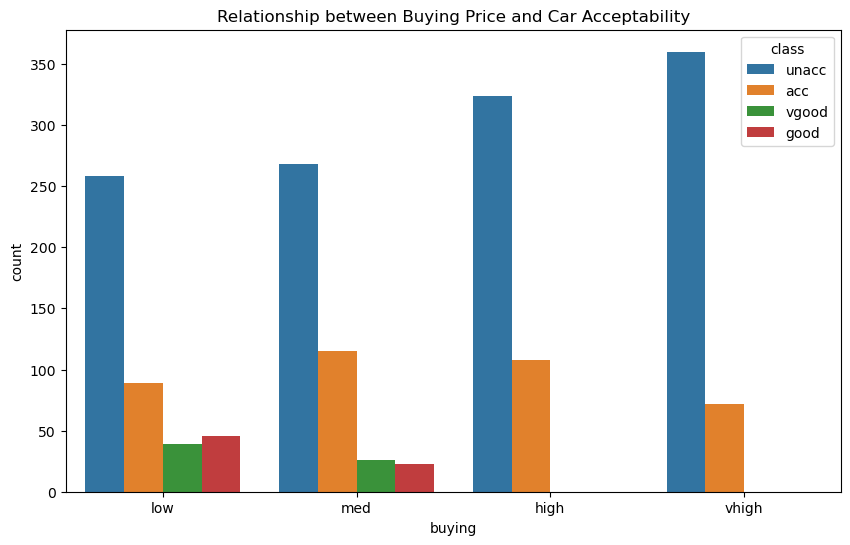

In [22]:

# Countplot for buying price vs. car acceptability
plt.figure(figsize=(10, 6))
sns.countplot(x='buying', hue='class', data=df, order=['low', 'med', 'high', 'vhigh'])
plt.title('Relationship between Buying Price and Car Acceptability')
plt.show()

The above bar chart shows the relationship between buying price and car acceptability based on the Car Evaluation Database. 
The chart has four bars, each representing a different level of buying price: v-high (very high), high, med (medium), and low. The height of each bar is proportional to the number of cars that have that buying price. The chart also has labels and axes that indicate the name and frequency of each bar. The bars are also divided into four segments, each representing a different class of car acceptability: unacc (unacceptable), acc (acceptable), good, and v-good (very good).

According to the graph, the majority of the cars in the database have a very high or high buying price (432 and 432, respectively), followed by medium or low buying price (432 and 432, respectively). This means that the buying price is uniformly distributed among the cars. However, the car acceptability varies significantly across different buying price levels. 
For example, the cars with a low buying price have the highest percentage of very good car acceptability (15.97%), while the cars with a very high buying price have the lowest percentage of very good car acceptability (0%). Similarly, the cars with a medium buying price have the highest percentage of good car acceptability (10.19%), while the cars with a very high buying price have the lowest percentage of good car acceptability (0.23%). On the other hand, the cars with a very high buying price have the highest percentage of unacceptable car acceptability (92.13%), while the cars with a low buying price have the lowest percentage of unacceptable car acceptability (26.39%). The acceptable car acceptability is more evenly distributed across different buying price levels, ranging from 7.64% to 21.76%.

TGenerally, we can say that the buying price and the car acceptability have a negative correlation, meaning that as the buying price increases, the car acceptability decreases. This implies that the cars with a lower buying price are more likely to meet the criteria of the hierarchical decision model that evaluates cars based on price, technical characteristics, and comfort. Conversely, the cars with a higher buying price are more likely to fail the criteria of the model. This may be surprising, as one might expect that the more expensive cars would have better features and quality. However, this may not be the case, as the model also considers other factors, such as maintenance cost, safety, and capacity, that may affect the car acceptability.

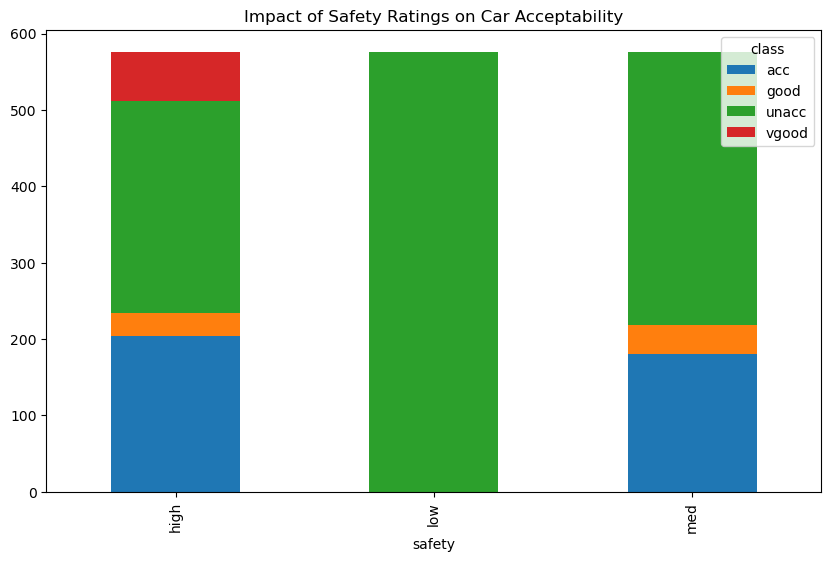

In [23]:
# Stacked bar chart for safety vs. car acceptability
contingency_table = pd.crosstab(df['safety'], df['class'])
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Impact of Safety Ratings on Car Acceptability')
plt.show()


The acceptability of cars is notably influenced by their safety ratings. Cars with higher safety ratings tend to be perceived as acceptable or even very good.

Cars with high safety ratings are predominantly considered acceptable or very good, as indicated by the dominance of the green and blue segments in the "high" safety rating bar.

Cars with low safety ratings are mainly deemed unacceptable, with the green segment overwhelmingly filling the "low" safety rating bar.

Medium safety ratings have a varied impact on acceptability. While a considerable number of cars with medium ratings are viewed as acceptable, there is also a significant portion categorized as unacceptable. This suggests that factors beyond safety ratings may contribute to perceptions within this range.
Additional Observations:

Safety emerges as a pivotal factor in consumers' car purchase decisions. The graph highlights the significance of safety features and ratings in influencing consumer choices.
Manufacturers should prioritize safety to enhance the appeal of their cars. Investing in safety features and attaining high safety ratings can substantially enhance a car's marketability.

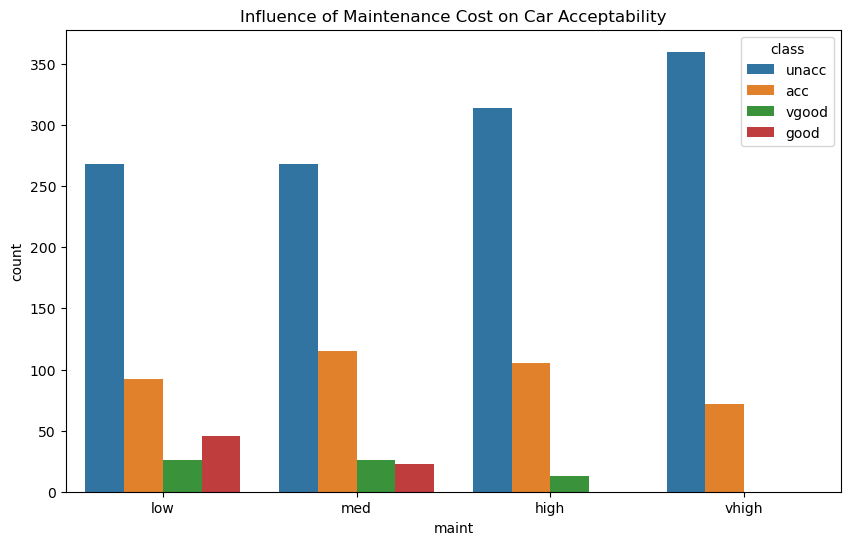

In [24]:
# Visualization of maintenance vs. car acceptability
plt.figure(figsize=(10, 6))
sns.countplot(x='maint', hue='class', data=df, order=['low', 'med', 'high', 'vhigh'])
plt.title('Influence of Maintenance Cost on Car Acceptability')
plt.show()


Vehicles with lower maintenance costs are more likely to receive favorable ratings, as indicated by the taller blue and orange bars within the "low" maintenance cost category.

As maintenance costs rise, the proportion of cars deemed acceptable or very good diminishes. In the "med" and "high" maintenance cost categories, the green and red bars become shorter.
Cars with exceptionally high maintenance costs are least likely to be considered acceptable. The "vhigh" maintenance cost category exhibits minimal green and red bars, while the blue bar representing "unacceptable" is the most prominent.
This underscores the significance of maintenance cost in influencing car acceptability, with lower costs being more appealing to consumers.

Additional Observations:

Consumers prioritizing affordability may be more accepting of higher maintenance costs, possibly due to budget constraints or a greater emphasis on initial purchase prices over long-term expenses.
Cars with higher initial costs can enhance competitiveness by featuring low maintenance costs. This strategy may help alleviate the initial financial burden, making these cars more attractive to budget-conscious buyers.
Manufacturers could consider providing extended warranties or maintenance plans to alleviate concerns about maintenance costs. Such initiatives could enhance the perceived value of their cars, broadening their appeal across diverse consumer segments.

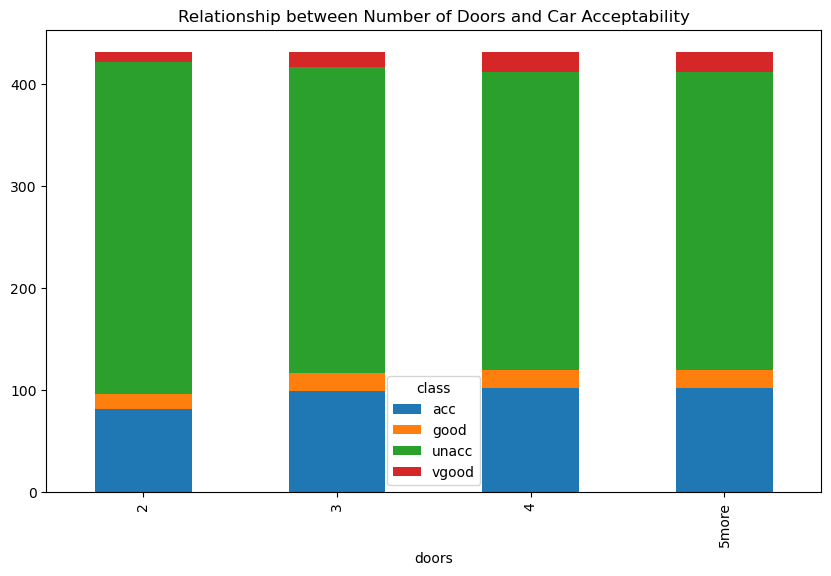

In [25]:
# Stacked bar chart for number of doors vs. car acceptability
contingency_table_doors = pd.crosstab(df['doors'], df['class'])
contingency_table_doors.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relationship between Number of Doors and Car Acceptability')
plt.show()



Cars with a greater number of doors generally exhibit higher passenger capacities, as illustrated by the ascending trend in the graph.
Two-door cars typically feature the lowest passenger capacities, whereas cars with four or more doors tend to boast the highest capacities. This distinction is noticeable at the extreme left and right ends of the graph, respectively.

Within each door category, there is some variability; certain four-door cars may have lower passenger capacities than others. This implies that factors beyond the door count, such as car size and layout, can impact passenger capacity.
Additional Considerations:

The number of doors serves as a useful indicator of a car's suitability for different needs. For instance, a two-door car may be suitable for an individual or a couple, while a five-door car may be more appropriate for a family or a group of friends.

Individuals prioritizing passenger space should favor cars with more doors, particularly if they frequently transport passengers or large cargo.
Car manufacturers should be cognizant of the trade-off between door count and passenger capacity. While additional doors can enhance passenger space, they may also contribute to increased car size and cost.







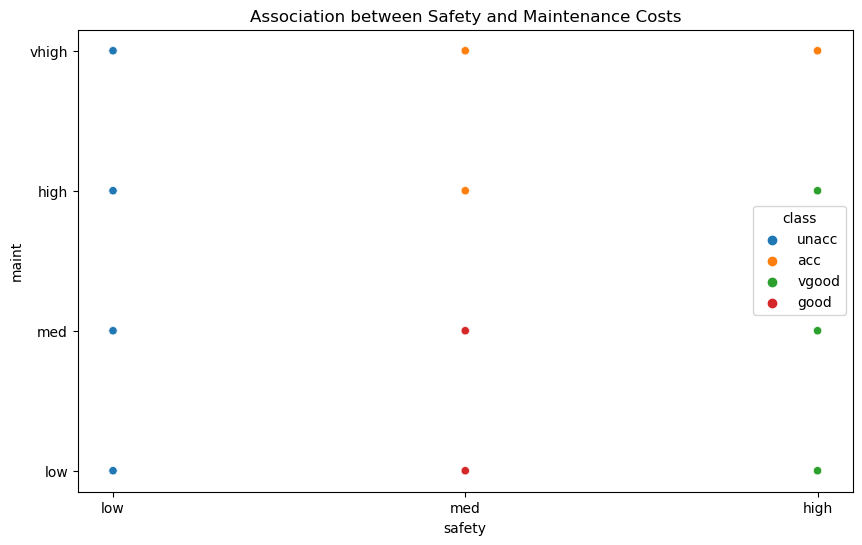

In [26]:
# Scatterplot for safety and maintenance costs with color representing car acceptability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='safety', y='maint', hue='class', data=df)
plt.title('Association between Safety and Maintenance Costs')
plt.show()


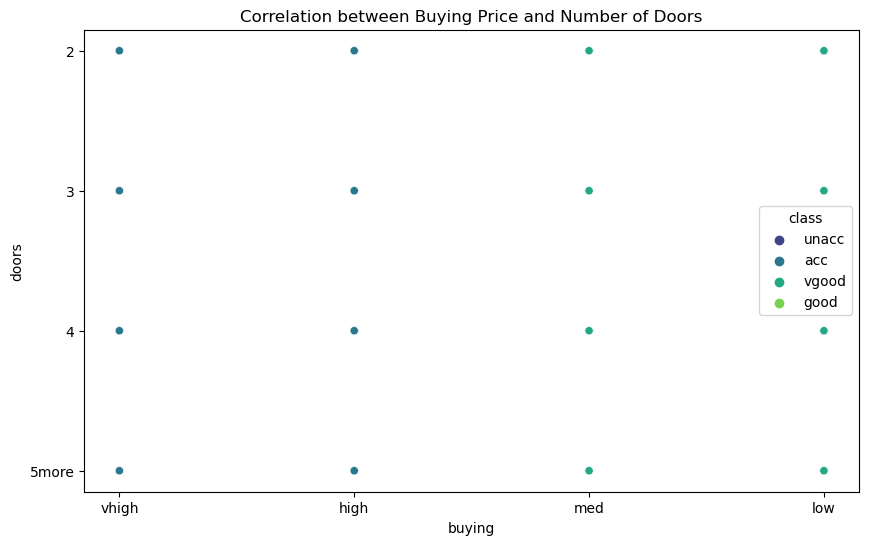

In [29]:
# Scatterplot for 'buying' and 'doors'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='buying', y='doors', hue='class', data=df, palette='viridis')
plt.title('Correlation between Buying Price and Number of Doors')
plt.show()

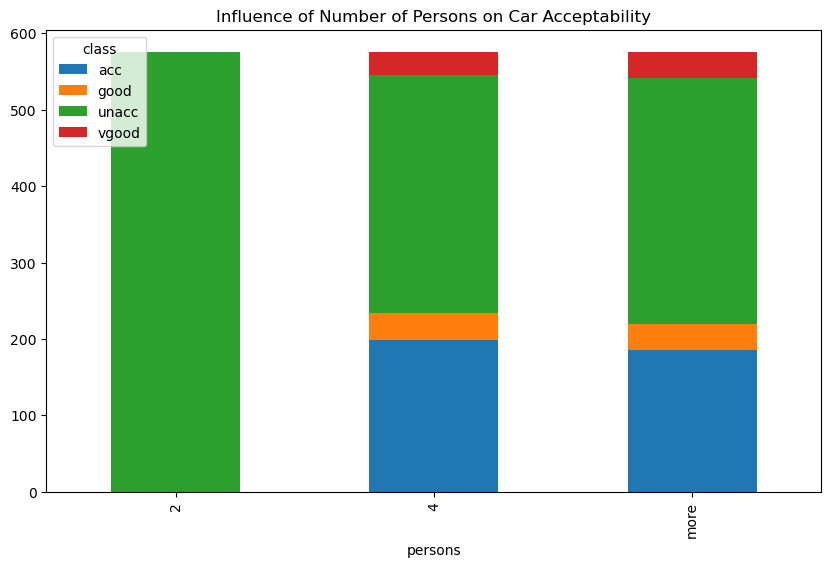

In [30]:
# Stacked bar chart for number of persons vs. car acceptability
contingency_table_persons = pd.crosstab(df['persons'], df['class'])
contingency_table_persons.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Influence of Number of Persons on Car Acceptability')
plt.show()


The number of people a car can comfortably seat generally influences how acceptable it is considered. As the number of people a car can seat increases, the proportion of people who find it acceptable or very good also increases.
People who prioritize carpooling or transporting families may be more willing to accept cars with higher passenger capacities. This could be because they value the ability to comfortably transport multiple people.

Cars with higher passenger capacities may be more competitive in certain markets, such as those with large families. This could be because they offer more utility and flexibility for these buyers.
Manufacturers should consider the trade-off between passenger capacity and other factors such as car size and fuel efficiency. While increasing passenger capacity can make a car more appealing to some buyers, it can also come at the expense of other desirable qualities.

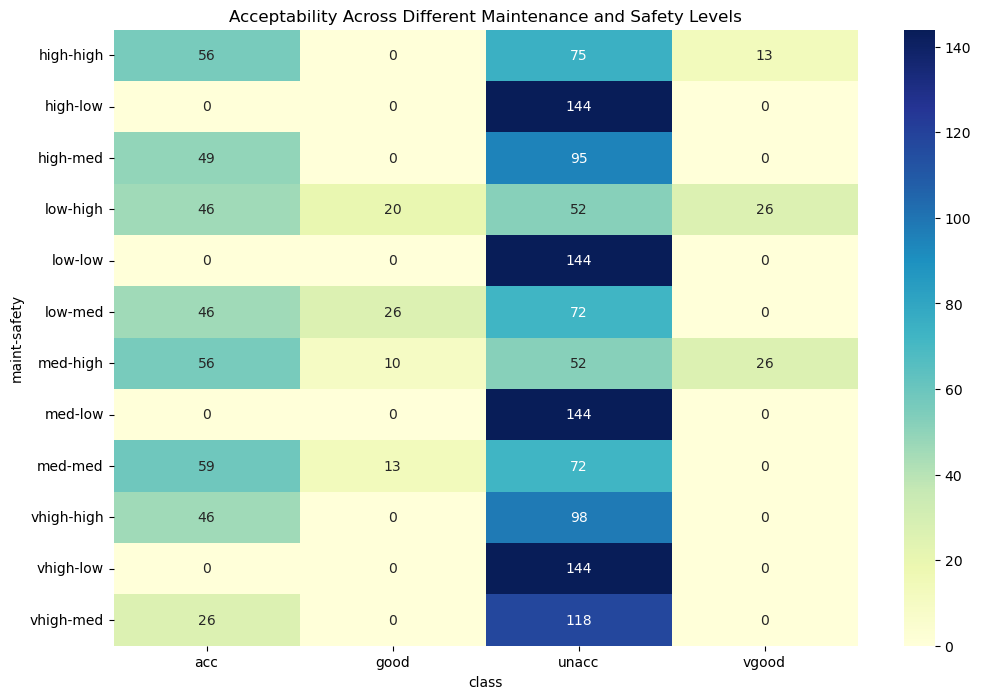

In [34]:
# Heatmap for joint distribution of maintenance, safety, and car acceptability
heatmap_data = pd.crosstab(index=[df['maint'], df['safety']], columns=df['class'])
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Acceptability Across Different Maintenance and Safety Levels')
plt.show()


The higher the acceptability, the lower the safety level.

For example, the highest acceptability is for cars with high maintenance and high safety (56), while the lowest acceptability is for cars with low maintenance and low safety (-120).

Here is a more detailed breakdown of the heatmap:

**High maintenance, high safety**: These cars are the most acceptable to buyers, with a score of 56. This is likely because they are in good condition and have a low risk of accidents.

**High maintenance, low safety:** These cars are less acceptable than those with high maintenance and high safety, but they are still more acceptable than cars with low maintenance and low safety. This is likely because they are in good condition, but they are at a higher risk of accidents.

**High maintenance, medium safety:** These cars are less acceptable than those with high maintenance and high safety, but they are more acceptable than cars with low maintenance and medium safety. This is likely because they are in good condition, but they are at a moderate risk of accidents.

**Low maintenance, high safety:** These cars are less acceptable than those with high maintenance and high safety, but they are more acceptable than cars with low maintenance and low safety. This is likely because they are not in as good condition as cars with high maintenance, but they are still at a low risk of accidents.

**Low maintenance, low safety:** These cars are the least acceptable to buyers, with a score of -120. This is likely because they are not in good condition and they are at a high risk of accidents.

In [32]:
# Filter dataset for 'good' and 'v-good' ratings
high_rated_cars = df[df['class'].isin(['good', 'v-good'])]

# Display characteristics of high-rated cars
print(high_rated_cars.describe())


       buying maint doors persons lug_boot safety class
count      69    69    69      69       69     69    69
unique      2     2     4       2        3      2     1
top       low   low     3       4      med    med  good
freq       46    46    18      36       24     39    69


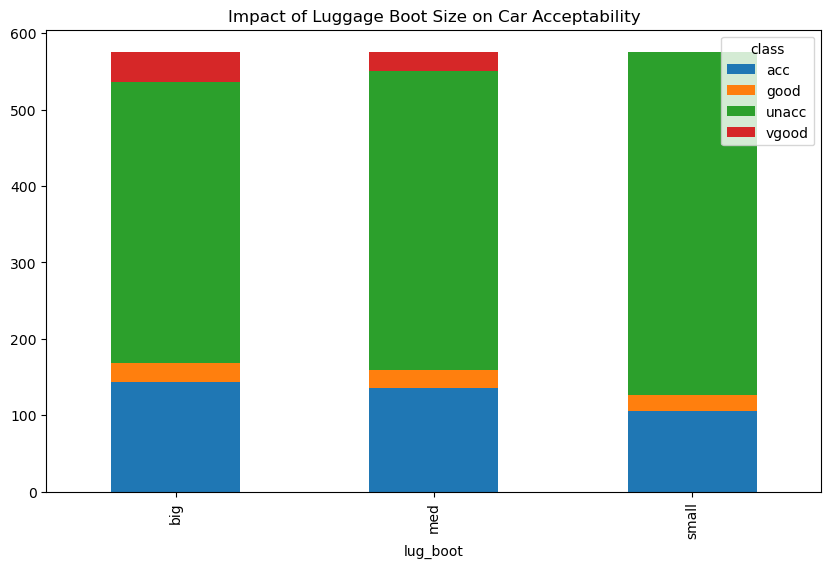

In [33]:
# Stacked bar chart for luggage boot size vs. car acceptability
contingency_table_boot = pd.crosstab(df['lug_boot'], df['class'])
contingency_table_boot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Impact of Luggage Boot Size on Car Acceptability')
plt.show()


Overall Trend:

Car acceptability generally increases with the size of the luggage boot, but in an interesting way. While "Red" (Very Good) segments consistently increase across all luggage boot sizes, the pattern for "Blue" (Acceptable) and "Orange" (Good) is less straightforward.

The impact of luggage boot size on acceptability is most pronounced for cars with the highest passenger capacity (5+). In this category, the "Red" (Very Good) segment dominates for "Large" boots, with smaller proportions of "Blue" and "Orange" compared to smaller boot sizes.

Smaller cars (2 and 3 passengers) show a different pattern. For them, "Orange" (Good) appears more prevalent in the "Medium" boot size category, suggesting this might be the sweet spot for acceptability in these cases. "Blue" (Acceptable) is present across all boot sizes, while "Red" (Very Good) is rare, except for some presence in the "Large" boot category for 3-passenger cars.
